In [54]:
from keras.datasets import mnist

In [55]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
x_train.shape

(60000, 28, 28)

In [58]:
single_image=x_train[4]

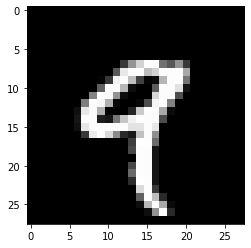

In [59]:
plt.imshow(single_image,cmap='gray')

In [60]:
from keras.utils.np_utils import to_categorical

In [61]:
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [62]:
y_test_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [63]:
x_train=x_train/x_train.max()

In [64]:
x_test=x_test/x_test.max()

In [65]:
x_train=x_train.reshape(60000,28,28,1)

In [66]:
x_test=x_test.reshape(10000,28,28,1)

In [67]:
y_train.shape

(60000,)

In [68]:
y_test.shape

(10000,)

In [69]:
from keras.models import Sequential

In [70]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [71]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(x_train,y_train_cat,epochs=2)

Epoch 1/2
60000/60000 [==============================] - 37s 619us/step - loss: 0.1381 - accuracy: 0.9578
Epoch 2/2
60000/60000 [==============================] - 40s 660us/step - loss: 0.0483 - accuracy: 0.9857


In [74]:
model.metrics_names

['loss', 'accuracy']

In [75]:
model.evaluate(x_test,y_test_cat)

10000/10000 [==============================] - 2s 190us/step


[0.042676394026225896, 0.9851999878883362]

In [76]:
from sklearn.metrics import classification_report

In [77]:
predictions=model.predict_classes(x_test)

In [78]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [79]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [80]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

